In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
len(data)

891

In [5]:
data["survived"].groupby(data.pclass).sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

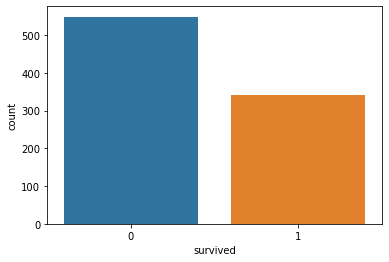

In [6]:
sns.countplot(x="survived",data=data)

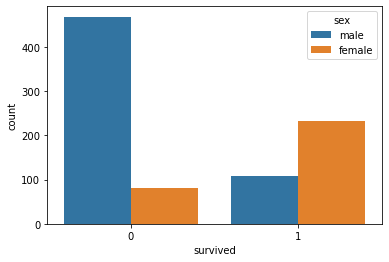

In [7]:
sns.countplot(x="survived",hue="sex",data=data)

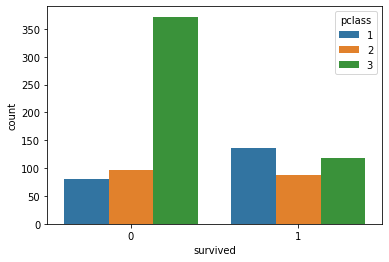

In [8]:
sns.countplot(x="survived",hue="pclass",data=data)

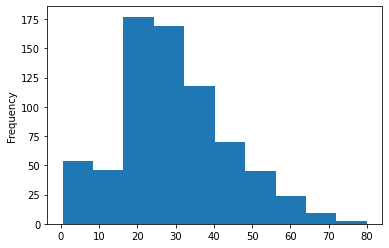

In [9]:
data["age"].plot.hist()

AttributeError: 'Rectangle' object has no property 'bin'

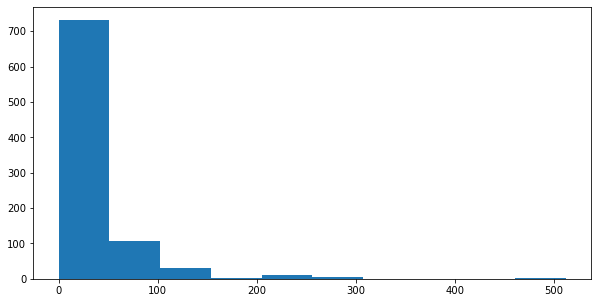

In [10]:
data["fare"].plot.hist(bin=20,figsize=(10,5))

In [11]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

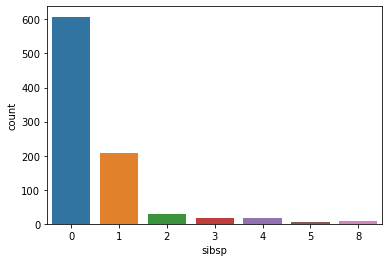

In [12]:
sns.countplot(x="sibsp",data=data)

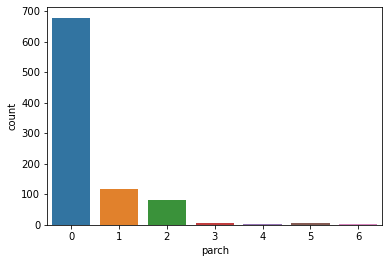

In [13]:
sns.countplot(x="parch",data=data)

In [14]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

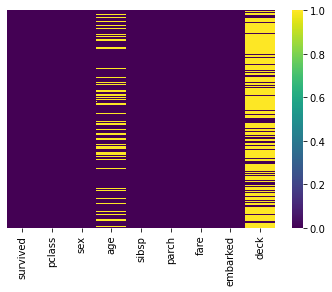

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

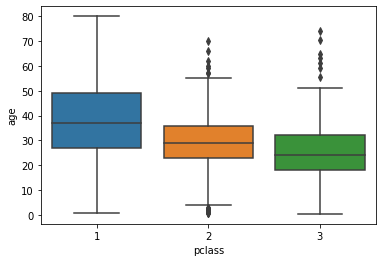

In [17]:
sns.boxplot(x="pclass",y="age",data=data)

In [18]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [19]:
data.drop(["deck"],axis=1,inplace=True)

In [20]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
data.dropna(inplace=True)

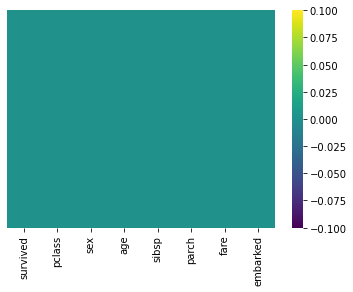

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [23]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [25]:
data.shape

(712, 8)

In [28]:
sex=pd.get_dummies(data["sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
embark=pd.get_dummies(data["embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
pcls=pd.get_dummies(data["pclass"],drop_first=True)
pcls.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [32]:
data=pd.concat([data,sex,embark,pcls],axis=1)

In [33]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [34]:
data.drop(["pclass","sex","embarked"],axis=1,inplace=True)

In [35]:
data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [36]:
X=data.drop(["survived"],axis=1)
y=data["survived"]

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg=LogisticRegression()

In [47]:
logreg.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
prediction=logreg.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.80       130\n           1       0.69      0.70      0.70        84\n\n    accuracy                           0.76       214\n   macro avg       0.75      0.75      0.75       214\nweighted avg       0.76      0.76      0.76       214\n'

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,prediction)

array([[104,  26],
       [ 25,  59]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,prediction)

0.7616822429906542